In [219]:
import pandas as pd

mmp_data = pd.read_excel('MMP_transactionDatewise.xlsx')
mmp_data = mmp_data[:-19] # This step is done to remove the discrepancy in the data.
mmp_data.head()

,STDDate,Project Name,State,Standard Service,TotalCount,Transaction(in Lakhs)
0,2013-01-01,Agriculture,Maharashtra,Agriculture & Allied,1599,0.01599
1,2013-01-01,Agriculture,Odisha,Licenses and Permits,1,0.00001
2,2013-01-01,Agriculture,Uttar Pradesh,Agriculture & Allied,98,0.00098
3,2013-01-01,Agriculture,West Bengal,Licenses and Permits,9,0.00009
4,2013-01-01,Commercial Taxes,Andhra Pradesh,Commercial Tax,62205,0.62205


In [220]:
education = {'Date': [], 'Count': []}
for i in range(0, len(mmp_data)):
    if (mmp_data['Project Name'][i] == 'CSC' and
       mmp_data['Standard Service'][i] == 'Education'):
        if (len(education['Date']) == 0 or
           education['Date'][-1] != mmp_data['STDDate'][i]):
            education['Date'].append(mmp_data['STDDate'][i])
            education['Count'].append(mmp_data['TotalCount'][i])
        else:
            education['Count'][-1] += mmp_data['TotalCount'][i]

In [221]:
education_data = pd.DataFrame(data=education)
education_data.head()

,Date,Count
0,2013-01-01,4
1,2013-01-03,2
2,2013-01-04,6
3,2013-01-07,1
4,2013-01-09,1


In [222]:
education_data.index = education_data.Date
education_data.drop('Date', axis=1, inplace=True)

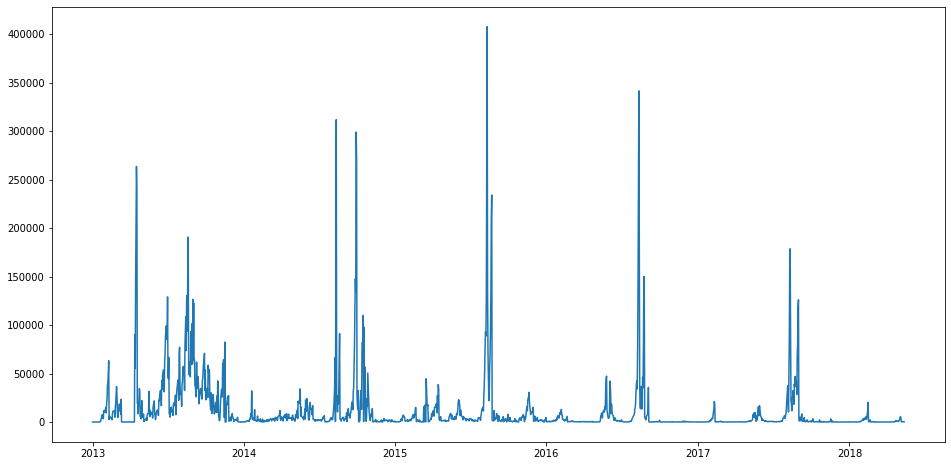

In [223]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(education_data)

# Linear Regression

In [224]:
new_data = pd.DataFrame(index=range(0,len(education_data)),columns=['Date', 'Count'])
for i in range(0,len(education_data)):
    new_data['Date'][i] = education['Date'][i]
    new_data['Count'][i] = education['Count'][i]
new_data.head()

,Date,Count
0,2013-01-01 00:00:00,4
1,2013-01-03 00:00:00,2
2,2013-01-04 00:00:00,6
3,2013-01-07 00:00:00,1
4,2013-01-09 00:00:00,1


In [7]:
from fastai.tabular import  add_datepart

In [225]:
add_datepart(new_data, 'Date')
new_data.drop(['Dayofyear', 'Dayofweek', 'Elapsed', 'Is_quarter_end', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'], axis=1, inplace=True)
new_data.head()

,Count,Year,Month,Day
0,4,2013,1,1
1,2,2013,1,3
2,6,2013,1,4
3,1,2013,1,7
4,1,2013,1,9


In [226]:
train_size = len(new_data)
print(train_size)

1936


In [227]:
train = new_data[:train_size]
x_train = train.drop('Count', axis=1)

In [228]:
from sklearn.linear_model import LinearRegression

In [229]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
from datetime import datetime, timedelta

test = pd.date_range('2018-05-14', '2019-05-14', freq='D')
test = pd.DataFrame(test, columns=['Date'])
test_date = pd.date_range('2018-05-14', '2019-05-14', freq='D')
test_date = pd.DataFrame(test, columns=['Date'])
add_datepart(test, 'Date')
test.drop(['Dayofyear', 'Dayofweek', 'Elapsed', 'Is_quarter_end', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'], axis=1, inplace=True)
test.head()

,Year,Month,Day
0,2018,5,14
1,2018,5,15
2,2018,5,16
3,2018,5,17
4,2018,5,18


In [231]:
import numpy as np
predictions = model.predict(test)

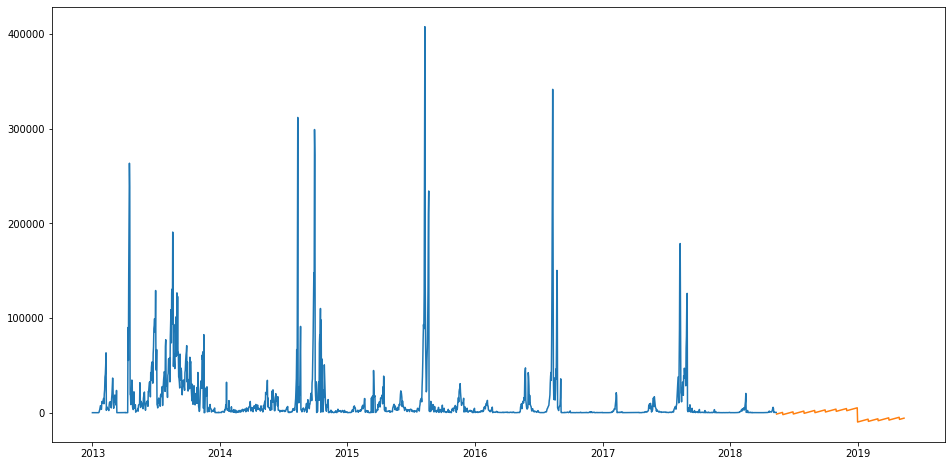

In [232]:
test['Predictions'] = predictions
test.index = test_date.Date
train.index = education_data[:train_size].index
plt.figure(figsize=(16,8))
plt.plot(train['Count'])
plt.plot(test['Predictions'])